In [1]:
import numpy as np
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt

In [2]:
%%bash

ls | grep xlsx

ST3.xlsx
ST4 Chr22 top gRNAs per gene.xlsx


In [3]:
dfs = []
for a in range(100):
    print(a)
    try:
        dfs.append(
            pd.read_excel("ST4 Chr22 top gRNAs per gene.xlsx", sheet_name=a)
        )
    except Exception as E:
        break

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


In [4]:
dfs[2] = pd.DataFrame(
    np.stack(dfs[2][dfs[2].columns[0]].apply(lambda x: x.split(",")).values)
)

In [5]:
dfs[2].columns = dfs[0].columns

In [14]:
def overlaps(a, b):
    results = {}
    genes = a[a.columns[3]].unique()
    for gene in genes:
        subset_a = a[a[a.columns[3]] == gene][a.columns[5]].values
        subset_b = b[b[b.columns[3]] == gene][b.columns[5]].values
        int_size = np.intersect1d(subset_a, subset_b).shape[0]
        results[gene] = (int_size/subset_a.shape[0])
    return(results)

In [15]:
len(dfs)

19

In [16]:
means = np.zeros(shape=(len(dfs), len(dfs)))
std = np.zeros(shape=(len(dfs), len(dfs)))
for i,a in enumerate(dfs):
    for j,b in tqdm(enumerate(dfs)):
        current_overlap = overlaps(a, b)
        current_overlap = [current_overlap[c] for c in current_overlap]
        means[i,j] = np.median(current_overlap)
        std[i,j] = np.std(current_overlap)

19it [00:40,  2.12s/it]
19it [00:39,  2.09s/it]
19it [00:41,  2.17s/it]
19it [00:39,  2.10s/it]
19it [00:40,  2.12s/it]
19it [00:40,  2.11s/it]
19it [00:40,  2.11s/it]
19it [00:39,  2.09s/it]
19it [00:39,  2.10s/it]
19it [00:42,  2.23s/it]
19it [00:43,  2.27s/it]
19it [00:43,  2.29s/it]
19it [00:43,  2.31s/it]
19it [00:42,  2.22s/it]
19it [00:39,  2.09s/it]
19it [00:39,  2.08s/it]
19it [00:38,  2.00s/it]
19it [00:37,  1.99s/it]
19it [00:37,  2.00s/it]


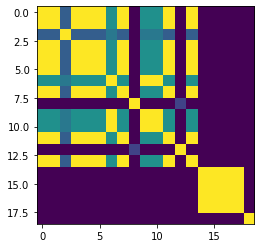

In [17]:
plt.imshow(means)

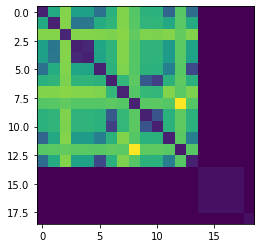

In [18]:
plt.imshow(std)

In [11]:
np.save("means.npy", means)

In [16]:
np.save("stds.npy", std)